# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city Ask BSC helped
    query_url= url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather= requests.get(query_url).json()        
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except #Exception as e:
        #print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | borogontsy
Processing Record 4 of Set 1 | kataragama
'coord'
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | okhotsk
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | mezhdurechensk
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | kharan
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | paipa
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | vilassar de mar
Processi

Processing Record 46 of Set 4 | hermanus
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | portoferraio
Processing Record 49 of Set 4 | pistoia
Processing Record 0 of Set 5 | usinsk
Processing Record 1 of Set 5 | vorkuta
Processing Record 2 of Set 5 | igarka
Processing Record 3 of Set 5 | palmer
Processing Record 4 of Set 5 | santa cruz
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | beau vallon
Processing Record 7 of Set 5 | zemio
Processing Record 8 of Set 5 | gamboula
Processing Record 9 of Set 5 | andergrove
Processing Record 10 of Set 5 | muntok
Processing Record 11 of Set 5 | olgii
'coord'
Processing Record 12 of Set 5 | mount isa
Processing Record 13 of Set 5 | valparaiso
Processing Record 14 of Set 5 | ugep
Processing Record 15 of Set 5 | great falls
Processing Record 16 of Set 5 | necochea
Processing Record 17 of Set 5 | hithadhoo
Processing Record 18 of Set 5 | bredasdorp
Processing Record 19 of Set 5 | conduaga
Processi

Processing Record 43 of Set 8 | jieshi
Processing Record 44 of Set 8 | nemuro
Processing Record 45 of Set 8 | breyten
Processing Record 46 of Set 8 | devinuwara
'coord'
Processing Record 47 of Set 8 | saipan
Processing Record 48 of Set 8 | kharp
Processing Record 49 of Set 8 | gisborne
Processing Record 0 of Set 9 | kununurra
Processing Record 1 of Set 9 | mbanza kongo
Processing Record 2 of Set 9 | le vauclin
Processing Record 3 of Set 9 | zainsk
Processing Record 4 of Set 9 | ypsilanti
Processing Record 5 of Set 9 | liberal
Processing Record 6 of Set 9 | waiuku
Processing Record 7 of Set 9 | saratamata
'coord'
Processing Record 8 of Set 9 | gadzhiyevo
Processing Record 9 of Set 9 | tobi village
'coord'
Processing Record 10 of Set 9 | gargalianoi
Processing Record 11 of Set 9 | hayma'
'coord'
Processing Record 12 of Set 9 | tanki leendert
'coord'
Processing Record 13 of Set 9 | mount gambier
Processing Record 14 of Set 9 | cargados carajos
'coord'
Processing Record 15 of Set 9 | tinaj

Processing Record 34 of Set 12 | aykhal
Processing Record 35 of Set 12 | tarauaca
Processing Record 36 of Set 12 | san cristobal
Processing Record 37 of Set 12 | shantobe
Processing Record 38 of Set 12 | tofol
Processing Record 39 of Set 12 | heihe
Processing Record 40 of Set 12 | sittwe
Processing Record 41 of Set 12 | cambria
Processing Record 42 of Set 12 | kilifi
Processing Record 43 of Set 12 | amahai
Processing Record 44 of Set 12 | sakakah
Processing Record 45 of Set 12 | brisas de zicatela
Processing Record 46 of Set 12 | santyoku
Processing Record 47 of Set 12 | waspan
Processing Record 48 of Set 12 | kyzyl-suu
Processing Record 49 of Set 12 | durango
Processing Record 0 of Set 13 | qiziltepa
Processing Record 1 of Set 13 | kirensk
Processing Record 2 of Set 13 | puerto carreno
Processing Record 3 of Set 13 | koulamoutou
Processing Record 4 of Set 13 | bhayavadar
Processing Record 5 of Set 13 | springbok
Processing Record 6 of Set 13 | midvagur
Processing Record 7 of Set 13 | 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,13.04,77,67,9.99,SH,1689822307
1,puerto natales,-51.7236,-72.4875,1.11,93,100,1.51,CL,1689822307
2,borogontsy,62.6683,131.1683,20.12,49,92,2.15,RU,1689822308
3,waitangi,-43.9535,-176.5597,12.12,87,100,2.68,NZ,1689822308
4,okhotsk,59.3833,143.3000,20.37,63,78,4.57,RU,1689822308


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

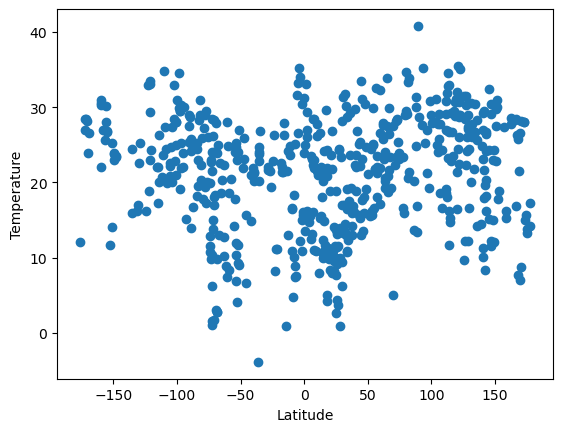

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

<Figure size 640x480 with 0 Axes>

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lng']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['city_lat']
y_values = city_data_df['city_humidity']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['city_lat']
y_values = city_data_df['city_clouds']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.show()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['city_lat']
y_values = city_data_df['city_wind']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('wind speed')
plt.show()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# YOUR CODE HERE
print(regress_values)

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE